In [44]:
import numpy as np
import matplotlib.pyplot as plt

### population, consist of 1,00,000 points uniformly distributed between 0.01 and 1000

In [45]:
# creating data consisting of 100000 points uniformly distribtuied between 0.01 and 1000
data = np.zeros(100000)     
for i in range(100000):
    data[i] = 0.01 * (i + 1)

print(data)

[1.0000e-02 2.0000e-02 3.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]


In [46]:
# true variance

# mean
data_sum = np.sum(data)
data_mean = data_sum / 100000

print("mean:", data_mean)

# variance
data_variance = np.sum((data - data_mean)**2) / 100000

print("data_variance:", data_variance)

mean: 500.005
data_variance: 83333.33332500001


In [47]:
def compute_sample_variance(sample):
    sample_mean = np.sum(sample) / 50

    s1_sqd = sum((xi - sample_mean) ** 2 for xi in sample) / (51)
    s2_sqd = sum((xi - sample_mean) ** 2 for xi in sample) / 50
    s3_sqd = sum((xi - sample_mean) ** 2 for xi in sample) / (49)

    return s1_sqd, s2_sqd, s3_sqd


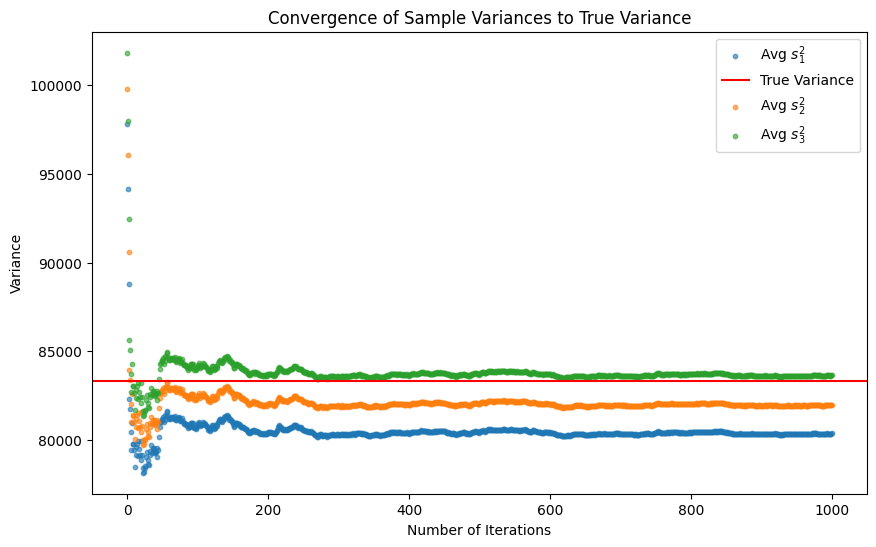

In [48]:
s1 = []
s2 = []
s3 = []

avg_s1 = []
avg_s2 = []
avg_s3 = []

itr = 1000

for _ in range(itr):
    sample = np.random.choice(data, 50, replace=True)
    s1_sqd, s2_sqd, s3_sqd = compute_sample_variance(sample)
    s1.append(s1_sqd)
    s2.append(s2_sqd)
    s3.append(s3_sqd)

    avg_s1.append(np.mean(s1))
    avg_s2.append(np.mean(s2))
    avg_s3.append(np.mean(s3))


# print("s1:", s1)
# print("s2:", s2)
# print("s3:", s3)

# print("avg_s1:", avg_s1)
# print("avg_s2:", avg_s2)
# print("avg_s3:", avg_s3)

plt.figure(figsize=(10, 6))

plt.scatter(range(itr), avg_s1, label = r'Avg $s_1^2$', s=10, alpha=0.6)
plt.axhline(y=data_variance, color='r', linestyle='-', label = 'True Variance')

plt.scatter(range(itr), avg_s2, label = r'Avg $s_2^2$', s=10, alpha=0.6)
# plt.axhline(y=data_variance, color='r', linestyle='-', label = 'True Variance')

plt.scatter(range(itr), avg_s3, label = r'Avg $s_3^2$', s=10, alpha=0.6)
# plt.axhline(y=data_variance, color='r', linestyle='-', label = 'True Variance')

plt.title('Convergence of Sample Variances to True Variance')
plt.xlabel('Number of Iterations')
plt.ylabel('Variance')
plt.legend()

plt.show()